# Use API + API Test Notebook

In [24]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd104255b-4f5e-4fe0-a420-e9ba56391076',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" or "jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11747,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976023e+07,1.976023e+07,False,NaN,1,NaN,NaN,None,2024-09-29T01:30:00.000Z,65767.887371,1.537077e+10,-50.8280,-0.199835,-0.121481,4.090533,11.338788,-0.807787,3.749725,1.299589e+12,56.3267,1.381126e+12,None,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:32:46.382991
1,1027,Ethereum,ETH,ethereum,9364,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203662e+08,1.203662e+08,True,NaN,2,NaN,NaN,None,2024-09-29T01:30:00.000Z,2670.492811,1.034032e+10,-37.9620,-0.323731,-0.947899,2.270816,5.941394,-18.543962,-23.533627,3.214372e+11,13.9317,3.214372e+11,None,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:32:46.382991
2,825,Tether USDt,USDT,tether,98938,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.194128e+11,1.213727e+11,True,NaN,3,NaN,NaN,None,2024-09-29T01:30:00.000Z,1.000163,3.875320e+10,-36.1623,0.012553,-0.004188,-0.010559,0.021483,0.028111,0.162318,1.194323e+11,5.1764,1.213925e+11,None,2024-09-29T01:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-29 08:32:46.382991
3,1839,BNB,BNB,bnb,2250,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459329e+08,1.459329e+08,False,NaN,4,NaN,NaN,None,2024-09-29T01:30:00.000Z,599.764921,1.853576e+09,-12.9108,-0.411404,-1.315685,2.432127,12.419434,2.609278,2.448915,8.752546e+10,3.7933,8.752546e+10,None,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:32:46.382991
4,5426,Solana,SOL,solana,747,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.689397e+08,5.855318e+08,True,NaN,5,NaN,NaN,None,2024-09-29T01:30:00.000Z,157.378698,1.325129e+09,-50.7885,-0.042238,-0.541076,6.010604,12.375818,-12.790656,6.467306,7.380112e+10,3.1983,9.215024e+10,None,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:32:46.382991
5,3408,USDC,USDC,usd-coin,22234,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.627472e+10,3.627472e+10,False,NaN,6,NaN,NaN,None,2024-09-29T01:30:00.000Z,0.999961,2.914584e+09,-48.9311,0.008007,-0.002760,-0.014546,0.010814,-0.002571,-0.004223,3.627329e+10,1.5720,3.627329e+10,None,2024-09-29T01:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-29 08:32:46.382991
6,52,XRP,XRP,xrp,1397,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.656404e+10,9.998716e+10,False,NaN,7,NaN,NaN,None,2024-09-29T01:31:00.000Z,0.611369,2.267559e+09,91.0508,-0.362619,3.752150,1.268016,8.527343,-5.276156,27.901666,3.458152e+10,1.4988,6.113693e+10,None,2024-09-29T01:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:32:46.382991
7,74,Dogecoin,DOGE,dogecoin,1075,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.461513e+11,1.461513e+11,True,NaN,8,NaN,NaN,None,2024-09-29T01:31:00.000Z,0.128393,1.469432e+09,10.3664,-0.561061,3.072116,17.466729,28.717954,2.147512,1.370659,1.876482e+10,0.8132,1.876482e+10,None,2024-09-29T01:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:32:46.382991
8,11419,Toncoin,TON,toncoin,569,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.535876e+

In [26]:
type(data)

dict

In [28]:
import pandas as pd

pd.set_option('display.max_columns',None)

In [30]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11747,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976023e+07,1.976023e+07,False,NaN,1,NaN,NaN,None,2024-09-29T01:30:00.000Z,65767.887371,1.537077e+10,-50.8280,-0.199835,-0.121481,4.090533,11.338788,-0.807787,3.749725,1.299589e+12,56.3267,1.381126e+12,None,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
1,1027,Ethereum,ETH,ethereum,9364,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203662e+08,1.203662e+08,True,NaN,2,NaN,NaN,None,2024-09-29T01:30:00.000Z,2670.492811,1.034032e+10,-37.9620,-0.323731,-0.947899,2.270816,5.941394,-18.543962,-23.533627,3.214372e+11,13.9317,3.214372e+11,None,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
2,825,Tether USDt,USDT,tether,98938,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.194128e+11,1.213727e+11,True,NaN,3,NaN,NaN,None,2024-09-29T01:30:00.000Z,1.000163,3.875320e+10,-36.1623,0.012553,-0.004188,-0.010559,0.021483,0.028111,0.162318,1.194323e+11,5.1764,1.213925e+11,None,2024-09-29T01:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-29 08:33:00.736773
3,1839,BNB,BNB,bnb,2250,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459329e+08,1.459329e+08,False,NaN,4,NaN,NaN,None,2024-09-29T01:30:00.000Z,599.764921,1.853576e+09,-12.9108,-0.411404,-1.315685,2.432127,12.419434,2.609278,2.448915,8.752546e+10,3.7933,8.752546e+10,None,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
4,5426,Solana,SOL,solana,747,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.689397e+08,5.855318e+08,True,NaN,5,NaN,NaN,None,2024-09-29T01:30:00.000Z,157.378698,1.325129e+09,-50.7885,-0.042238,-0.541076,6.010604,12.375818,-12.790656,6.467306,7.380112e+10,3.1983,9.215024e+10,None,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
5,3408,USDC,USDC,usd-coin,22234,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.627472e+10,3.627472e+10,False,NaN,6,NaN,NaN,None,2024-09-29T01:30:00.000Z,0.999961,2.914584e+09,-48.9311,0.008007,-0.002760,-0.014546,0.010814,-0.002571,-0.004223,3.627329e+10,1.5720,3.627329e+10,None,2024-09-29T01:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-29 08:33:00.736773
6,52,XRP,XRP,xrp,1397,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.656404e+10,9.998716e+10,False,NaN,7,NaN,NaN,None,2024-09-29T01:31:00.000Z,0.611369,2.267559e+09,91.0508,-0.362619,3.752150,1.268016,8.527343,-5.276156,27.901666,3.458152e+10,1.4988,6.113693e+10,None,2024-09-29T01:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
7,74,Dogecoin,DOGE,dogecoin,1075,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.461513e+11,1.461513e+11,True,NaN,8,NaN,NaN,None,2024-09-29T01:31:00.000Z,0.128393,1.469432e+09,10.3664,-0.561061,3.072116,17.466729,28.717954,2.147512,1.370659,1.876482e+10,0.8132,1.876482e+10,None,2024-09-29T01:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
8,11419,Toncoin,TON,toncoin,569,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.535876e+

In [78]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'd104255b-4f5e-4fe0-a420-e9ba56391076',
    }

    session = Session()
    session.headers.update(headers)

    try:
          response = session.get(url, params=parameters)
          data = json.loads(response.text)
          # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
          print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')

    # Use pd.concat instead of append
    df = pd.concat([df, df2])

    if not os.path.isfile(r"C:\Desktop\python\csv files\API.csv"):
        df.to_csv(r"C:\Desktop\python\csv files\API.csv", header='column_name')
    else:
        df.to_csv(r"C:\Desktop\python\csv files\API.csv",mode = 'a',header = False)

In [80]:
import os
from time import time 
from time import sleep

for i in range(333):
    api_runner()
    print('API Number Completed')
    sleep(60)
exit()

API Number Completed
API Number Completed


KeyboardInterrupt: 

In [82]:
# pd.set_option('display.max_rows',None)
df11 = pd.read_csv(r"C:\Desktop\python\csv files\API.csv")
df11

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11747,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.976023e+07,1.976023e+07,False,NaN,1,NaN,NaN,NaN,2024-09-29T01:30:00.000Z,65767.887371,1.537077e+10,-50.8280,-0.199835,-0.121481,4.090533,11.338788,-0.807787,3.749725,1.299589e+12,56.3267,1.381126e+12,NaN,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
1,1,1027,Ethereum,ETH,ethereum,9364,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203662e+08,1.203662e+08,True,NaN,2,NaN,NaN,NaN,2024-09-29T01:30:00.000Z,2670.492811,1.034032e+10,-37.9620,-0.323731,-0.947899,2.270816,5.941394,-18.543962,-23.533627,3.214372e+11,13.9317,3.214372e+11,NaN,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
2,2,825,Tether USDt,USDT,tether,98938,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.194128e+11,1.213727e+11,True,NaN,3,NaN,NaN,NaN,2024-09-29T01:30:00.000Z,1.000163,3.875320e+10,-36.1623,0.012553,-0.004188,-0.010559,0.021483,0.028111,0.162318,1.194323e+11,5.1764,1.213925e+11,NaN,2024-09-29T01:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-29 08:33:00.736773
3,3,1839,BNB,BNB,bnb,2250,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459329e+08,1.459329e+08,False,NaN,4,NaN,NaN,NaN,2024-09-29T01:30:00.000Z,599.764921,1.853576e+09,-12.9108,-0.411404,-1.315685,2.432127,12.419434,2.609278,2.448915,8.752546e+10,3.7933,8.752546e+10,NaN,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
4,4,5426,Solana,SOL,solana,747,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.689397e+08,5.855318e+08,True,NaN,5,NaN,NaN,NaN,2024-09-29T01:30:00.000Z,157.378698,1.325129e+09,-50.7885,-0.042238,-0.541076,6.010604,12.375818,-12.790656,6.467306,7.380112e+10,3.1983,9.215024e+10,NaN,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
5,5,3408,USDC,USDC,usd-coin,22234,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.627472e+10,3.627472e+10,False,NaN,6,NaN,NaN,NaN,2024-09-29T01:30:00.000Z,0.999961,2.914584e+09,-48.9311,0.008007,-0.002760,-0.014546,0.010814,-0.002571,-0.004223,3.627329e+10,1.5720,3.627329e+10,NaN,2024-09-29T01:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-29 08:33:00.736773
6,6,52,XRP,XRP,xrp,1397,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.656404e+10,9.998716e+10,False,NaN,7,NaN,NaN,NaN,2024-09-29T01:31:00.000Z,0.611369,2.267559e+09,91.0508,-0.362619,3.752150,1.268016,8.527343,-5.276156,27.901666,3.458152e+10,1.4988,6.113693e+10,NaN,2024-09-29T01:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
7,7,74,Dogecoin,DOGE,dogecoin,1075,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.461513e+11,1.461513e+11,True,NaN,8,NaN,NaN,NaN,2024-09-29T01:31:00.000Z,0.128393,1.469432e+09,10.3664,-0.561061,3.072116,17.466729,28.717954,2.147512,1.370659,1.876482e+10,0.8132,1.876482e+10,NaN,2024-09-29T01:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
8,8,11419,Toncoin,TON,toncoin,569,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",N

In [84]:
pd.set_option('display.float_format',lambda x: '%.5f' %x)

In [96]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11747,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19760231.00000,19760231.00000,False,NaN,1,NaN,NaN,None,2024-09-29T01:30:00.000Z,65767.88737,15370773990.73262,-50.82800,-0.19984,-0.12148,4.09053,11.33879,-0.80779,3.74973,1299588646834.99683,56.32670,1381125634793.17993,None,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
1,1027,Ethereum,ETH,ethereum,9364,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120366230.40261,120366230.40261,True,NaN,2,NaN,NaN,None,2024-09-29T01:30:00.000Z,2670.49281,10340324168.83055,-37.96200,-0.32373,-0.94790,2.27082,5.94139,-18.54396,-23.53363,321437152979.56274,13.93170,321437152979.56000,None,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
2,825,Tether USDt,USDT,tether,98938,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119412806447.75142,121372683870.58083,True,NaN,3,NaN,NaN,None,2024-09-29T01:30:00.000Z,1.00016,38753200078.40511,-36.16230,0.01255,-0.00419,-0.01056,0.02148,0.02811,0.16232,119432273428.77013,5.17640,121392470355.83000,None,2024-09-29T01:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-29 08:33:00.736773
3,1839,BNB,BNB,bnb,2250,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145932939.47498,145932939.47498,False,NaN,4,NaN,NaN,None,2024-09-29T01:30:00.000Z,599.76492,1853576314.56693,-12.91080,-0.41140,-1.31569,2.43213,12.41943,2.60928,2.44891,87525457978.63055,3.79330,87525457978.63000,None,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
4,5426,Solana,SOL,solana,747,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,468939682.08933,585531819.16142,True,NaN,5,NaN,NaN,None,2024-09-29T01:30:00.000Z,157.37870,1325128799.28616,-50.78850,-0.04224,-0.54108,6.01060,12.37582,-12.79066,6.46731,73801116815.08670,3.19830,92150235596.08000,None,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
5,3408,USDC,USDC,usd-coin,22234,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36274718319.47462,36274718319.47462,False,NaN,6,NaN,NaN,None,2024-09-29T01:30:00.000Z,0.99996,2914584182.30505,-48.93110,0.00801,-0.00276,-0.01455,0.01081,-0.00257,-0.00422,36273288030.89669,1.57200,36273288030.90000,None,2024-09-29T01:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-29 08:33:00.736773
6,52,XRP,XRP,xrp,1397,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56564039920.00000,99987161962.00000,False,NaN,7,NaN,NaN,None,2024-09-29T01:31:00.000Z,0.61137,2267558763.93594,91.05080,-0.36262,3.75215,1.26802,8.52734,-5.27616,27.90167,34581517256.70945,1.49880,61136929585.69000,None,2024-09-29T01:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
7,74,Dogecoin,DOGE,dogecoin,1075,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146151306383.70526,146151306383.70526,True,NaN,8,NaN,NaN,None,2024-09-29T01:31:00.000Z,0.12839,1469431613.26683,10.36640,-0.56106,3.07212,17.46673,28.71795,2.14751,1.37066,18764820226.93322,0.81320,18764820226.93000,None,2024-09-29T01:31:00.000Z,NaN,N

In [174]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
'quote.USD.percent_change_7d','quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3



,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.08429,-0.16079,4.20171,11.14814,-0.59694,3.65187
Ethereum,0.00618,-0.89220,2.40538,5.82690,-18.41051,-23.76340
Tether USDt,0.00789,0.00106,-0.01313,0.01670,0.02958,0.17261
BNB,-0.06679,-1.47570,2.53573,12.32901,2.74011,2.32779
Solana,0.40363,-0.50326,6.22546,12.53262,-12.71830,6.37087
USDC,0.00256,-0.00075,-0.02071,0.00499,-0.00444,0.00290
XRP,0.05966,3.67623,1.41056,8.33973,-5.41394,27.81149
Dogecoin,0.56751,3.37201,17.74000,28.52463,2.56446,1.67510
Toncoin,-0.32415,-3.23255,2.69870,6.15161,-13.72055,-24.19439


In [176]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.08429
             quote.USD.percent_change_24h    -0.16079
             quote.USD.percent_change_7d      4.20171
             quote.USD.percent_change_30d    11.14814
             quote.USD.percent_change_60d    -0.59694
             quote.USD.percent_change_90d     3.65187
Ethereum     quote.USD.percent_change_1h      0.00618
             quote.USD.percent_change_24h    -0.89220
             quote.USD.percent_change_7d      2.40538
             quote.USD.percent_change_30d     5.82690
             quote.USD.percent_change_60d   -18.41051
             quote.USD.percent_change_90d   -23.76340
Tether USDt  quote.USD.percent_change_1h      0.00789
             quote.USD.percent_change_24h     0.00106
             quote.USD.percent_change_7d     -0.01313
             quote.USD.percent_change_30d     0.01670
             quote.USD.percent_change_60d     0.02958
             quote.USD.percent_change_90

In [178]:
type(df4)

pandas.core.series.Series

In [180]:
type(df3)

pandas.core.frame.DataFrame

In [182]:
type(df5)

pandas.core.frame.DataFrame

In [184]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.08429
            quote.USD.percent_change_24h  -0.16079
            quote.USD.percent_change_7d    4.20171
            quote.USD.percent_change_30d  11.14814
            quote.USD.percent_change_60d  -0.59694
            quote.USD.percent_change_90d   3.65187
Ethereum    quote.USD.percent_change_1h    0.00618
            quote.USD.percent_change_24h  -0.89220
            quote.USD.percent_change_7d    2.40538
            quote.USD.percent_change_30d   5.82690
            quote.USD.percent_change_60d -18.41051
            quote.USD.percent_change_90d -23.76340
Tether USDt quote.USD.percent_change_1h    0.00789
            quote.USD.percent_change_24h   0.00106
            quote.USD.percent_change_7d   -0.01313
            quote.USD.percent_change_30d   0.01670
            quote.USD.percent_change_60d   0.02958
            quote.USD.percent_change_90d   0.17261
BNB         quote.USD.percent_change_1h   -0.06679
            quote.USD.percent_change_24h  -1.47570
            quote.USD.percent_change_7d    2.53573
            quote.USD.percent_change_30d  12.32901
            quote.USD.percent_change_60d   2.74011
            quote.USD.percent_change_90d   2.32779
Solana      quote.USD.percent_change_1h    0.40363
            quote.USD.percent_change_24h  -0.50326
            quote.USD.percent_change_7d    6.22546
            quote.USD.percent_change_30d  12.53262
            quote.USD.percent_change_60d -12.71830
            quote.USD.percent_change_90d   6.37087
USDC        quote.USD.percent_change_1h    0.00256
            quote.USD.percent_change_24h  -0.00075
            quote.USD.percent_change_7d   -0.02071
            quote.USD.percent_change_30d   0.00499
            quote.USD.percent_change_60d  -0.00444
            quote.USD.percent_change_90d   0.00290
XRP         quote.USD.percent_change_1h    0.05966
            quote.USD.percent_change_24h   3.67623
            quote.USD.percent_change_7d    1.41056
            quote.USD.percent_change_30d   8.33973
            quote.USD.percent_change_60d  -5.41394
            quote.USD.percent_change_90d  27.81149
Dogecoin    quote.USD.percent_change_1h    0.56751
            quote.USD.percent_change_24h   3.37201
            quote.USD.percent_change_7d   17.74000
            quote.USD.percent_change_30d  28.52463
            quote.USD.percent_change_60d   2.56446
            quote.USD.percent_change_90d   1.67510
Toncoin     quote.USD.percent_change_1h   -0.32415
            quote.USD.percent_change_24h  -3.23255
            quote.USD.percent_change_7d    2.69870
            quote.USD.percent_change_30d   6.15161
            quote.USD.percent_change_60d -13.72055
            quote.USD.percent_change_90d -24.19439
Cardano     quote.USD.percent_change_1h   -0.35924
            quote.USD.percent_change_24h  -1.36645
            quote.USD.percent_change_7d   10.94102
            quote.USD.percent_change_30d  11.12365
            quote.USD.percent_change_60d  -1.72769
            quote.USD.percent_change_90d  -0.21107
TRON        quote.USD.percent_change_1h    0.03580
            quote.USD.percent_change_24h  -0.15116
            quote.USD.percent_change_7d    1.87006
            quote.USD.percent_change_30d  -3.10457
            quote.USD.percent_change_60d  17.81490
            quote.USD.percent_change_90d  24.29106
Avalanche   quote.USD.percent_change_1h   -0.32177
            quote.USD.percent_change_24h  -4.73524
            quote.USD.percent_change_7d    6.15734
            quote.USD.percent_change_30d  26.57115
            quote.USD.percent_change_60d  10.28449
            quote.USD.percent_change_90d  -1.94661
Shiba Inu   quote.USD.percent_change_1h    1.24084
            quote.USD.percent_change_24h  -4.62769
            quote.USD.percent_change_7d   32.50523
            quote.USD.percent_change_30d  42.03571
            quote.USD.percent_change_60d  21.57336
            quo

In [186]:
df5.count()

values    90
dtype: int64

In [192]:
index = pd.Index(range(90))


df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.08429
1,Bitcoin,quote.USD.percent_change_24h,-0.16079
2,Bitcoin,quote.USD.percent_change_7d,4.20171
3,Bitcoin,quote.USD.percent_change_30d,11.14814
4,Bitcoin,quote.USD.percent_change_60d,-0.59694
5,Bitcoin,quote.USD.percent_change_90d,3.65187
6,Ethereum,quote.USD.percent_change_1h,0.00618
7,Ethereum,quote.USD.percent_change_24h,-0.89220
8,Ethereum,quote.USD.percent_change_7d,2.40538
9,Ethereum,quote.USD.percent_change_30d,5.82690


In [198]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.08429
1,Bitcoin,quote.USD.percent_change_24h,-0.16079
2,Bitcoin,quote.USD.percent_change_7d,4.20171
3,Bitcoin,quote.USD.percent_change_30d,11.14814
4,Bitcoin,quote.USD.percent_change_60d,-0.59694
5,Bitcoin,quote.USD.percent_change_90d,3.65187
6,Ethereum,quote.USD.percent_change_1h,0.00618
7,Ethereum,quote.USD.percent_change_24h,-0.89220
8,Ethereum,quote.USD.percent_change_7d,2.40538
9,Ethereum,quote.USD.percent_change_30d,5.82690


In [206]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
                                                       'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
                                                       'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],
                                                      ['1h','24h','7d', '30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.08429
1,Bitcoin,24h,-0.16079
2,Bitcoin,7d,4.20171
3,Bitcoin,30d,11.14814
4,Bitcoin,60d,-0.59694
5,Bitcoin,90d,3.65187
6,Ethereum,1h,0.00618
7,Ethereum,24h,-0.89220
8,Ethereum,7d,2.40538
9,Ethereum,30d,5.82690


In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

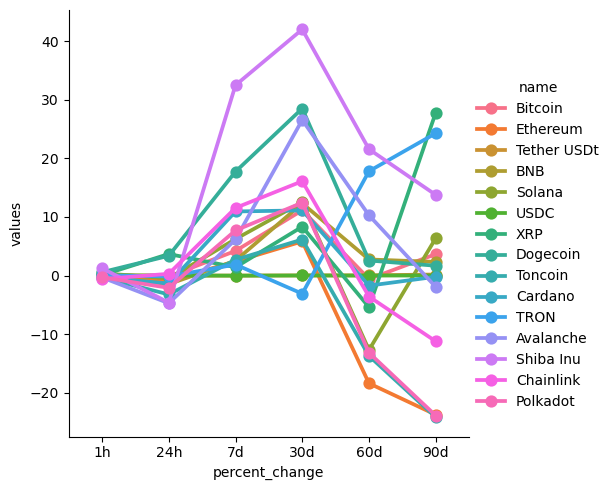

In [208]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [212]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11747,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19760231.00000,19760231.00000,False,NaN,1,NaN,NaN,None,2024-09-29T01:30:00.000Z,65767.88737,15370773990.73262,-50.82800,-0.19984,-0.12148,4.09053,11.33879,-0.80779,3.74973,1299588646834.99683,56.32670,1381125634793.17993,None,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
1,1027,Ethereum,ETH,ethereum,9364,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120366230.40261,120366230.40261,True,NaN,2,NaN,NaN,None,2024-09-29T01:30:00.000Z,2670.49281,10340324168.83055,-37.96200,-0.32373,-0.94790,2.27082,5.94139,-18.54396,-23.53363,321437152979.56274,13.93170,321437152979.56000,None,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
2,825,Tether USDt,USDT,tether,98938,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119412806447.75142,121372683870.58083,True,NaN,3,NaN,NaN,None,2024-09-29T01:30:00.000Z,1.00016,38753200078.40511,-36.16230,0.01255,-0.00419,-0.01056,0.02148,0.02811,0.16232,119432273428.77013,5.17640,121392470355.83000,None,2024-09-29T01:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-29 08:33:00.736773
3,1839,BNB,BNB,bnb,2250,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145932939.47498,145932939.47498,False,NaN,4,NaN,NaN,None,2024-09-29T01:30:00.000Z,599.76492,1853576314.56693,-12.91080,-0.41140,-1.31569,2.43213,12.41943,2.60928,2.44891,87525457978.63055,3.79330,87525457978.63000,None,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
4,5426,Solana,SOL,solana,747,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,468939682.08933,585531819.16142,True,NaN,5,NaN,NaN,None,2024-09-29T01:30:00.000Z,157.37870,1325128799.28616,-50.78850,-0.04224,-0.54108,6.01060,12.37582,-12.79066,6.46731,73801116815.08670,3.19830,92150235596.08000,None,2024-09-29T01:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
5,3408,USDC,USDC,usd-coin,22234,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36274718319.47462,36274718319.47462,False,NaN,6,NaN,NaN,None,2024-09-29T01:30:00.000Z,0.99996,2914584182.30505,-48.93110,0.00801,-0.00276,-0.01455,0.01081,-0.00257,-0.00422,36273288030.89669,1.57200,36273288030.90000,None,2024-09-29T01:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-29 08:33:00.736773
6,52,XRP,XRP,xrp,1397,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56564039920.00000,99987161962.00000,False,NaN,7,NaN,NaN,None,2024-09-29T01:31:00.000Z,0.61137,2267558763.93594,91.05080,-0.36262,3.75215,1.26802,8.52734,-5.27616,27.90167,34581517256.70945,1.49880,61136929585.69000,None,2024-09-29T01:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-29 08:33:00.736773
7,74,Dogecoin,DOGE,dogecoin,1075,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146151306383.70526,146151306383.70526,True,NaN,8,NaN,NaN,None,2024-09-29T01:31:00.000Z,0.12839,1469431613.26683,10.36640,-0.56106,3.07212,17.46673,28.71795,2.14751,1.37066,18764820226.93322,0.81320,18764820226.93000,None,2024-09-29T01:31:00.000Z,NaN,N

In [214]:
df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,65767.88737,2024-09-29 08:33:00.736773
0,Bitcoin,65755.27532,2024-09-29 08:46:18.743629
0,Bitcoin,65782.36406,2024-09-29 08:47:46.088659
0,Bitcoin,65770.19152,2024-09-29 08:48:48.672732
0,Bitcoin,65789.89800,2024-09-29 08:49:49.654101
0,Bitcoin,65870.41480,2024-09-29 09:00:29.839775
0,Bitcoin,65874.50121,2024-09-29 09:01:30.828656


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

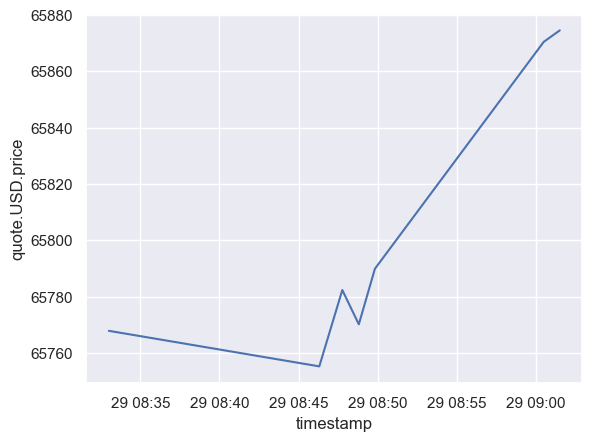

In [220]:
sns.set_theme(style = "darkgrid")


sns.lineplot(x='timestamp', y='quote.USD.price',data = df8)